In [1]:
import sys
import seaborn as sns
from matplotlib.colors import ListedColormap
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
from matplotlib import rc
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cmocean
import os
import warnings
import pandas as pd
import h5py
from datetime import datetime
from scipy import interpolate
sys.path.append('/Users/imarkelo/git/PorousMediaLab/')
from porousmedialab.batch import Batch

sns.set_style("whitegrid")
sns.set_style("ticks")
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_style("ticks")
rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)
plt.rcParams['figure.figsize'] = 6, 4
pd.options.display.max_columns = 999
pd.options.display.max_rows = 400
str(datetime.now())
%matplotlib inline

In [2]:
cl_stclaitr_209 = pd.read_excel('../../../measurements/St Clair Lake/Chloride_in_Lake_St_Clair.xlsx', sheet_name='st. 209')[['Collect Date','Result B']]
cl_stclaitr_209['Collect Date'] = pd.to_datetime(cl_stclaitr_209['Collect Date'])
cl_stclaitr_209['Collect Date'] = pd.to_datetime(cl_stclaitr_209['Collect Date'])
cl_stclaitr_209['Date'] = cl_stclaitr_209['Collect Date'].dt.date
cl_stclaitr_209['Year'] = cl_stclaitr_209['Collect Date'].dt.year
cl_stclaitr_209['Month'] = cl_stclaitr_209['Collect Date'].dt.month
cl_stclaitr_209['seq_m'] = (cl_stclaitr_209['Year'] - 1996)*12 + cl_stclaitr_209['Month']

cl_stclaitr_210 = pd.read_excel('../../../measurements/St Clair Lake/Chloride_in_Lake_St_Clair.xlsx', sheet_name='st. 210')[['Collect Date','Result B']]
cl_stclaitr_210['Collect Date'] = pd.to_datetime(cl_stclaitr_210['Collect Date'])
cl_stclaitr_210['Collect Date'] = pd.to_datetime(cl_stclaitr_210['Collect Date'])
cl_stclaitr_210['Date'] = cl_stclaitr_210['Collect Date'].dt.date
cl_stclaitr_210['Year'] = cl_stclaitr_210['Collect Date'].dt.year
cl_stclaitr_210['Month'] = cl_stclaitr_210['Collect Date'].dt.month
cl_stclaitr_210['seq_m'] = (cl_stclaitr_210['Year'] - 1996)*12 + cl_stclaitr_210['Month']

cl_stclaitr_210 = cl_stclaitr_210.groupby('seq_m').mean().reset_index()
cl_stclaitr_209 = cl_stclaitr_209.groupby('seq_m').mean().reset_index()

cl_stclaitr = pd.merge(cl_stclaitr_210, cl_stclaitr_209, on=['seq_m', 'Year'])[['seq_m','Year','Result B_y', 'Result B_x']]

cl_stclaitr['Cl'] = (cl_stclaitr['Result B_y'] + cl_stclaitr['Result B_x'])/2

cl_stclaitr = cl_stclaitr.groupby('seq_m').mean().reset_index()

In [11]:
rivers_cl_kta = pd.read_csv('rivers_cl_kta.csv')
discharge_ckmy = pd.read_csv('discharge_ckmy.csv')

In [12]:
rivers_cl_kta = rivers_cl_kta.drop(columns=['Belle_R'])

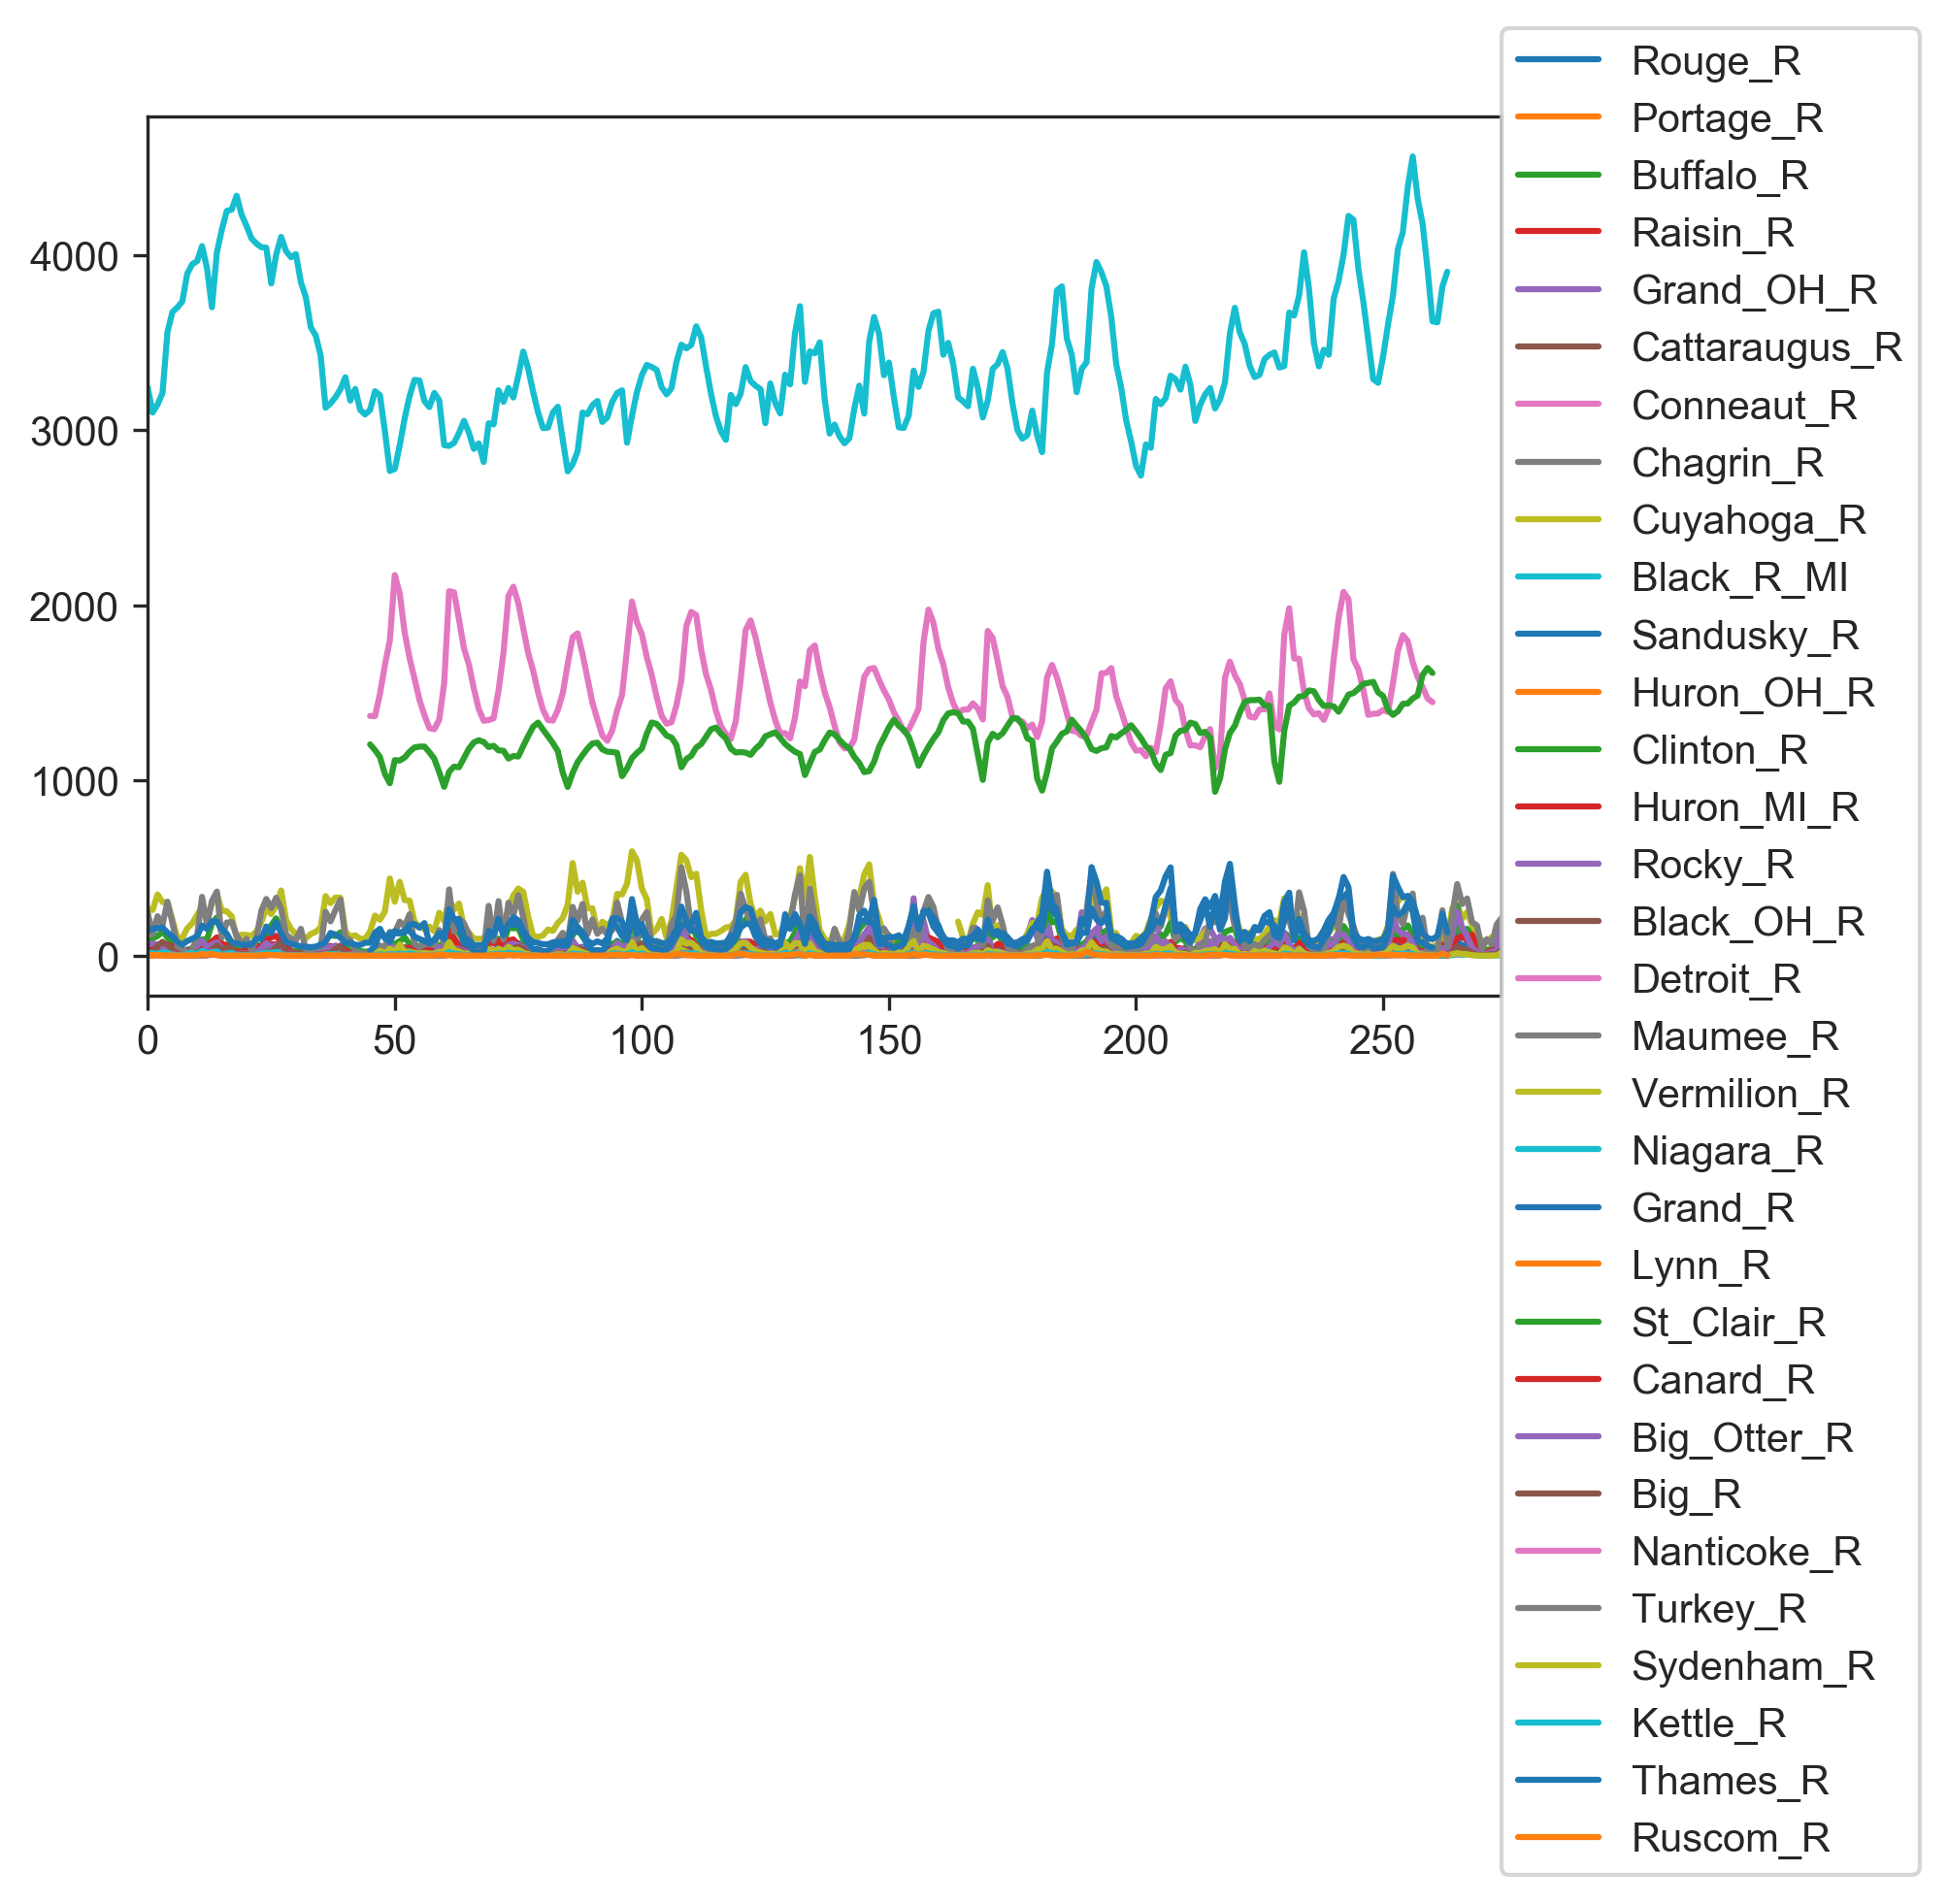

In [5]:

fig, ax = plt.subplots(dpi=300)
rivers_cl_kta[rivers_cl_kta.columns[3:]].plot(ax=ax)
# ax.set_yscale('log')
plt.legend(loc=(1,-1))

In [6]:
rivers_cl_kta[['St_Clair_R']].describe()

,St_Clair_R
count,216.000000
mean,1243.120923
std,138.541930
min,935.145188
25%,1159.319987
50%,1229.166544
75%,1314.000299
max,1641.712267


In [7]:
# rivers_cl_kta = rivers_cl_kta.clip(0,1641)

In [8]:
rivers = {'ca': {'clair': ['Thames_R', 'Sydenham_R', 'Ruscom_R'],
                 'eastern': ['Grand_R', 'Nanticoke_R', 'Lynn_R', 'Big_R'],
                 'central': ['Big_Otter_R', 'Kettle_R'],
                 'western': ['Turkey_R', 'Canard_R']},
          'us': {'clair': ['Clinton_R', 'Belle_R', 'Black_R_MI'],
                 'eastern': ['Cattaraugus_R', 'Buffalo_R'],
                 'central': ['Sandusky_R', 'Black_OH_R', 'Vermilion_R', 'Rocky_R', 'Cuyahoga_R',
                             'Chagrin_R', 'Grand_OH_R', 'Conneaut_R'],
                 'western': ['Rouge_R', 'Huron_MI_R', 'Raisin_R', 'Maumee_R', 'Portage_R']},
          'StClair': ['St_Clair_R'],
            'Detroit': ['Detroit_R']}


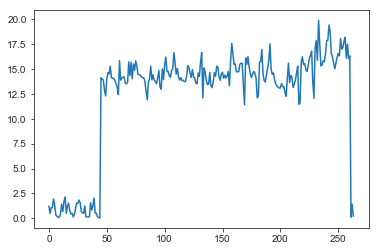

In [14]:
Wwb = 1/12*discharge_ckmy[rivers['us']['western']+rivers['ca']['western']].sum(axis=1)/0.75 + 1/12*discharge_ckmy[rivers['Detroit']].sum(axis=1)
WTwb = Wwb.index.values
plt.plot(WTwb, Wwb)

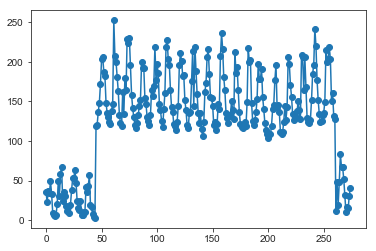

In [15]:
Lwb = 1/12*rivers_cl_kta[rivers['us']['western']+rivers['ca']['western']].sum(axis=1)/0.75 + 1/12*rivers_cl_kta[rivers['Detroit']].sum(axis=1)
LTwb = Lwb.index.values
Lwb_spl = sp.interpolate.InterpolatedUnivariateSpline(LTwb, Lwb, ext=3)
plt.scatter(LTwb, Lwb)
plt.plot(LTwb, Lwb_spl(LTwb))

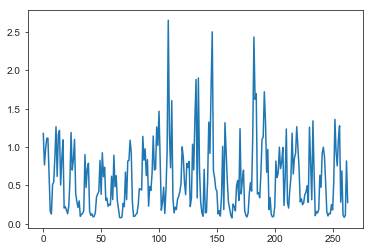

In [16]:
Wcb = 1/12*discharge_ckmy[rivers['us']['central']+rivers['ca']['central']].sum(axis=1)/0.75
WTcb = Wcb.index.values
plt.plot(WTcb, Wcb)

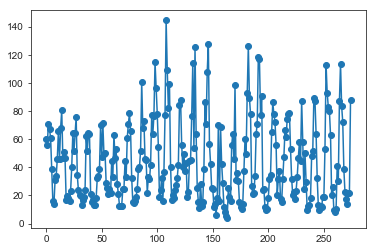

In [17]:
Lcb = 1/12*rivers_cl_kta[rivers['us']['central']+rivers['ca']['central']].sum(axis=1)/0.75
LTcb = Lcb.index.values
Lcb_spl = sp.interpolate.InterpolatedUnivariateSpline(LTcb, Lcb, ext=3)
plt.scatter(LTcb, Lcb)
plt.plot(LTcb, Lcb_spl(LTcb))

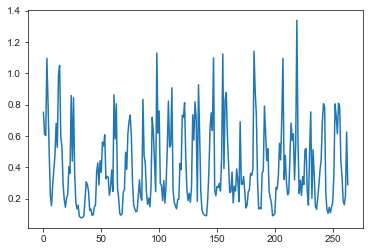

In [18]:
Web = 1/12*discharge_ckmy[rivers['us']['eastern']+rivers['ca']['eastern']].sum(axis=1)/0.75
WTeb = Web.index.values
plt.plot(WTeb, Web)

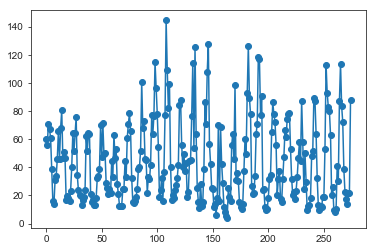

In [19]:
Leb = 1/12*rivers_cl_kta[rivers['us']['central']+rivers['ca']['central']].sum(axis=1)/0.75
LTeb = Leb.index.values
Leb_spl = sp.interpolate.InterpolatedUnivariateSpline(LTeb, Leb, ext=3)
plt.scatter(LTeb, Leb)
plt.plot(LTeb, Leb_spl(LTeb))

## Residence time

In [20]:
# bl.constants['Vsc']/(5265+29)/1e6*3600*24*365*365
# bl.constants['Vwb']/(5594+85)/1e6*3600*24*365*365
# bl.constants['Vcb']/(5594+856)/1e6*3600*24*365
# bl.constants['Veb']/(6203+188)/1e6*3600*24*365


In [21]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600

st_clair_area_ratio = conversion_fac_mmy_to_cms_st_clair/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)
western_area_ratio = conversion_fac_mmy_to_cms_western/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)
central_area_ratio = conversion_fac_mmy_to_cms_central/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)
eastern_area_ratio = conversion_fac_mmy_to_cms_eastern/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)

In [35]:
shift = 5*12

tend = 22*12 - shift
dt = 0.5
bl = Batch(tend, dt)
# bl.add_species(name='Csc', init_conc=8.35)
bl.add_species(name='Cwb', init_conc=15)
bl.add_species(name='Ccb', init_conc=15)
bl.add_species(name='Ceb', init_conc=11)
# bl.constants['Vsc'] = 4.17
bl.constants['Vwb'] = 25
bl.constants['Vcb'] = 305
bl.constants['Veb'] = 154

bl.constants['Dwc'] = 0
bl.constants['Dce'] = 10



# bl.functions['LTsc'] = np.array2string(Lsc.index.values-shift, separator=',')
# bl.functions['Lsc'] = np.array2string(Lsc.values, separator=',')
# bl.functions['WTsc'] = np.array2string(Wsc.index.values-shift, separator=',')
# bl.functions['Wsc'] = np.array2string(Wsc.values, separator=',')
bl.functions['LTwb'] = np.array2string(Lwb.index.values-shift, separator=',')
bl.functions['Lwb'] = np.array2string(Lwb.values, separator=',')
bl.functions['WTwb'] = np.array2string(Wwb.index.values-shift, separator=',')
bl.functions['Wwb'] = np.array2string(Wwb.values, separator=',')
bl.functions['LTcb'] = np.array2string(Lcb.index.values-shift, separator=',')
bl.functions['Lcb'] = np.array2string(Lcb.values, separator=',')
bl.functions['WTcb'] = np.array2string(Wcb.index.values-shift, separator=',')
bl.functions['Wcb'] = np.array2string(Wcb.values, separator=',')
bl.functions['LTeb'] = np.array2string(Leb.index.values-shift, separator=',')
bl.functions['Leb'] = np.array2string(Leb.values, separator=',')
bl.functions['WTeb'] = np.array2string(Web.index.values-shift, separator=',')
bl.functions['Web'] = np.array2string(Web.values, separator=',')
# bl.functions['Wsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTsc, Wsc,ext=3)'
# bl.functions['Lsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTsc, Lsc, ext=3)'
bl.functions['Wwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTwb, Wwb,ext=3)'
bl.functions['Lwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTwb, Lwb, ext=3)'
bl.functions['Wcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTcb, Wcb,ext=3)'
bl.functions['Lcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTcb, Lcb, ext=3)'
bl.functions['Web_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTeb, Web,ext=3)'
bl.functions['Leb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTeb, Leb, ext=3)'



bl.rates['Ewcw'] = 'Dwc/Vwb*(Ccb - Cwb)'
bl.rates['Ewcc'] = 'Dwc/Vcb*(Ccb - Cwb)'
bl.rates['Ecec'] = 'Dce/Vcb*(Ccb - Ceb)'
bl.rates['Ecee'] = 'Dce/Veb*(Ccb - Ceb)'

# bl.dcdt['Csc'] = 'Lsc_spl(TIME+1/12*120)/Vsc  - Wsc_spl(TIME)*Csc/Vsc'
bl.dcdt['Cwb'] = '(Lwb_spl(TIME)+1/12*150)/Vwb  - Wwb_spl(TIME)*Cwb/Vwb + Ewcw'
bl.dcdt['Ccb'] = '(Lcb_spl(TIME)+1/12*50)/Vcb  + (Wwb_spl(TIME))*Cwb/Vcb - (Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Vcb - Ewcc - Ecec'
bl.dcdt['Ceb'] = '(Leb_spl(TIME)+1/12*-50)/Veb  + (Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Veb - (Wwb_spl(TIME)+Wcb_spl(TIME)+Web_spl(TIME))*Ceb/Veb + Ecee'
bl.solve()

Simulation started:
	 2019-09-14 17:33:22


Estimated time of the code execution:
	 0h:00m:01s
Will finish approx.:
	 2019-09-14 17:33:24


Total execution time:
	 0h:00m:02s


In [30]:
# f, axes = plt.subplots(1,3, figsize=(9,3), dpi=200, sharey=True)





# axes[0].plot((bl.time + shift)/12 + 1996, bl.species['Cwb']['concentration'].flatten(), label='Western', c=sns.color_palette()[0],lw=2)

# # axes[1].plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ccb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[0], label='No inter-basin exchange')
# # axes[1].plot((bl.time + shift)/12 + 1996, bl.species['Ccb']['concentration'].flatten(), c=sns.color_palette()[0], lw=3)
# axes[1].fill_between((bl_up.time + shift)/12 + 1996, bl_up.species['Ccb']['concentration'].flatten(), bl_down.species['Ccb']['concentration'].flatten(), color=sns.color_palette()[0])
# # axes[1].plot((bl_down.time + shift)/12 + 1996, bl_down.species['Ccb']['concentration'].flatten(),  ls=':', c=sns.color_palette()[0])


# # axes[2].plot((bl.time + shift)/12 + 1996, bl.species['Ceb']['concentration'].flatten(), c=sns.color_palette()[0], lw=3)
# axes[2].fill_between((bl_up.time + shift)/12 + 1996, bl_up.species['Ceb']['concentration'].flatten(), bl_down.species['Ceb']['concentration'].flatten(), color=sns.color_palette()[0])
# # axes[2].plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ceb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[0])





# axes[0].scatter(WB_AWA.Year + (WB_AWA.Month-1)/11, WB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
# axes[1].scatter(CB_AWA.Year + (CB_AWA.Month-1)/11, CB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
# axes[2].scatter(EB_AWA.Year + (EB_AWA.Month-1)/11, EB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10, label='Area-weighted $\overline{Cl}$')




# props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='k')
# axes[0].text(0.03,0.96, 'Western Basin', transform=axes[0].transAxes,
#         verticalalignment='top', bbox=props)
# axes[1].text(0.03,0.96, 'Central Basin', transform=axes[1].transAxes,
#         verticalalignment='top', bbox=props)
# axes[2].text(0.03,0.96, 'Eastern Basin', transform=axes[2].transAxes,
#         verticalalignment='top', bbox=props)


# # axes[0].text(-0.2, -0., 'Chloride Concentration, $mg\cdot L^{-1}$', transform=axes[0][0].transAxes, horizontalalignment='center',
# #         verticalalignment='center', bbox=props, rotation=90)

# axes[0].set_xticks(np.array([1996,2000,2004, 2008, 2012, 2016])+1)
# axes[1].set_xticks(np.array([1996,2000,2004, 2008, 2012, 2016])+1)
# axes[2].set_xticks(np.array([1996,2000,2004, 2008, 2012, 2016])+1)
# # axes[1][0].set_xticklabels(['03','05','07', '09', '11', '13', '15', '17'])

# axes[0].set_xlim(2003,2017)
# axes[1].set_xlim(2003,2017)
# axes[2].set_xlim(2003,2017)

# axes[0].set_ylim(8,20)
# axes[1].set_ylim(8,20)
# axes[2].set_ylim(8,20)

# axes[0].set_ylabel('Chloride concentration, [$mg$ $L^{-1}$]')


# # axes[0][0].legend(loc=2)
# axes[2].legend(loc=4, frameon=False)
# axes[1].legend(loc=4, frameon=False)


# plt.tight_layout(w_pad=0.2)

# # for ax in axes:
# #     ax.grid(lw=0.3)
# # plt.subplots_adjust(left=0.15)   
# sns.despine(offset=0)

# f.savefig('cl_modeled_vs_measured.pdf')


In [454]:
bl.reconstruct_rates()

In [455]:
bl.rates['Ewcw'] = 'Dwc/Vwb*(Ccb - Cwb)'
bl.rates['Ewcc'] = 'Dwc/Vcb*(Ccb - Cwb)'
bl.rates['Ecec'] = 'Dce/Vcb*(Ccb - Ceb)'
bl.rates['Ecee'] = 'Dce/Veb*(Ccb - Ceb)'
Ceb = bl.species['Ceb']['concentration'].flatten()
Ccb = bl.species['Ccb']['concentration'].flatten()

In [456]:
rate_ec = bl.constants['Vcb']*np.abs(bl.estimated_rates['Ecec'][0])/np.abs((Ccb - Ceb))
rate_ee = bl.constants['Veb']*np.abs(bl.estimated_rates['Ecee'][0])/np.abs((Ccb - Ceb))
# water_rate = rate*()

(1997, 2017)

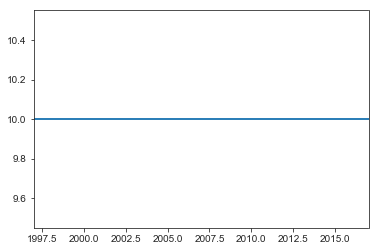

In [457]:
plt.plot((bl.time + shift)/12 + 1996, rate_ec, label='Western', c=sns.color_palette()[0])
plt.plot((bl.time + shift)/12 + 1996, rate_ee, label='Western', c=sns.color_palette()[0])
plt.xlim(1997,2017)
# plt.ylim(0,0.15)

In [458]:
shift = 0

tend = 22*12 - shift
dt = 0.5
bl_noex = Batch(tend, dt)
bl_noex.add_species(name='Csc', init_conc=8.35)
bl_noex.add_species(name='Cwb', init_conc=15)
bl_noex.add_species(name='Ccb', init_conc=13)
bl_noex.add_species(name='Ceb', init_conc=13)
bl_noex.constants['Vsc'] = 4.17
bl_noex.constants['Vwb'] = 25
bl_noex.constants['Vcb'] = 305
bl_noex.constants['Veb'] = 154

bl_noex.constants['Dwc'] = 0.
bl_noex.constants['Dce'] = 0.


bl_noex.functions['LTsc'] = np.array2string(Lsc.index.values-shift, separator=',')
bl_noex.functions['Lsc'] = np.array2string(Lsc.values, separator=',')
bl_noex.functions['WTsc'] = np.array2string(Wsc.index.values-shift, separator=',')
bl_noex.functions['Wsc'] = np.array2string(Wsc.values, separator=',')
bl_noex.functions['LTwb'] = np.array2string(Lwb.index.values-shift, separator=',')
bl_noex.functions['Lwb'] = np.array2string(Lwb.values, separator=',')
bl_noex.functions['WTwb'] = np.array2string(Wwb.index.values-shift, separator=',')
bl_noex.functions['Wwb'] = np.array2string(Wwb.values, separator=',')
bl_noex.functions['LTcb'] = np.array2string(Lcb.index.values-shift, separator=',')
bl_noex.functions['Lcb'] = np.array2string(Lcb.values, separator=',')
bl_noex.functions['WTcb'] = np.array2string(Wcb.index.values-shift, separator=',')
bl_noex.functions['Wcb'] = np.array2string(Wcb.values, separator=',')
bl_noex.functions['LTeb'] = np.array2string(Leb.index.values-shift, separator=',')
bl_noex.functions['Leb'] = np.array2string(Leb.values, separator=',')
bl_noex.functions['WTeb'] = np.array2string(Web.index.values-shift, separator=',')
bl_noex.functions['Web'] = np.array2string(Web.values, separator=',')
bl_noex.functions['Wsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTsc, Wsc,ext=3)'
bl_noex.functions['Lsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTsc, Lsc, ext=3)'
bl_noex.functions['Wwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTwb, Wwb,ext=3)'
bl_noex.functions['Lwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTwb, Lwb, ext=3)'
bl_noex.functions['Wcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTcb, Wcb,ext=3)'
bl_noex.functions['Lcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTcb, Lcb, ext=3)'
bl_noex.functions['Web_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTeb, Web,ext=3)'
bl_noex.functions['Leb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTeb, Leb, ext=3)'

bl_noex.dcdt['Csc'] = 'Lsc_spl(TIME+1/12*120)/Vsc  - Wsc_spl(TIME)*Csc/Vsc'
bl_noex.dcdt['Cwb'] = '(Lwb_spl(TIME)+1/12)/Vwb  + Wsc_spl(TIME)*Csc/Vwb - (Wsc_spl(TIME)+Wwb_spl(TIME))*Cwb/Vwb - Dwc/Vwb*(Cwb - Ccb)'
bl_noex.dcdt['Ccb'] = '(Lcb_spl(TIME)+1/12*+50)/Vcb  + (Wsc_spl(TIME)+Wwb_spl(TIME))*Cwb/Vcb - (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Vcb - Dwc/Vcb*(Ccb - Cwb) - Dce/Vcb*(Ccb - Ceb)'
bl_noex.dcdt['Ceb'] = '(Leb_spl(TIME)+1/12*-50)/Veb  + (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Veb - (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME)+Web_spl(TIME))*Ceb/Veb - Dce/Veb*(Ceb - Ccb)'
bl_noex.solve()

Simulation started:
	 2019-09-14 17:20:05


Estimated time of the code execution:
	 0h:00m:03s
Will finish approx.:
	 2019-09-14 17:20:09


Total execution time:
	 0h:00m:05s


In [459]:
bl.dynamic_functions['dydt_str']
1

1

### Area weighted averages or depth integrated values:

In [25]:
EB_A = pd.read_csv('Eastern_basin_averages_mgL.csv')
CB_A = pd.read_csv('Central_basin_averages_mgL.csv')
WB_A = pd.read_csv('Western_basin_averages_mgL.csv')
WB_AWA = pd.read_csv('Western_basin_area_weighted_averages_mgL.csv')
CB_AWA = pd.read_csv('Central_basin_area_weighted_averages_mgL.csv')
EB_AWA = pd.read_csv('Eastern_basin_area_weighted_averages_mgL.csv')

In [26]:

WB_AWA = WB_AWA[WB_AWA.Value<19]


No handles with labels found to put in legend.


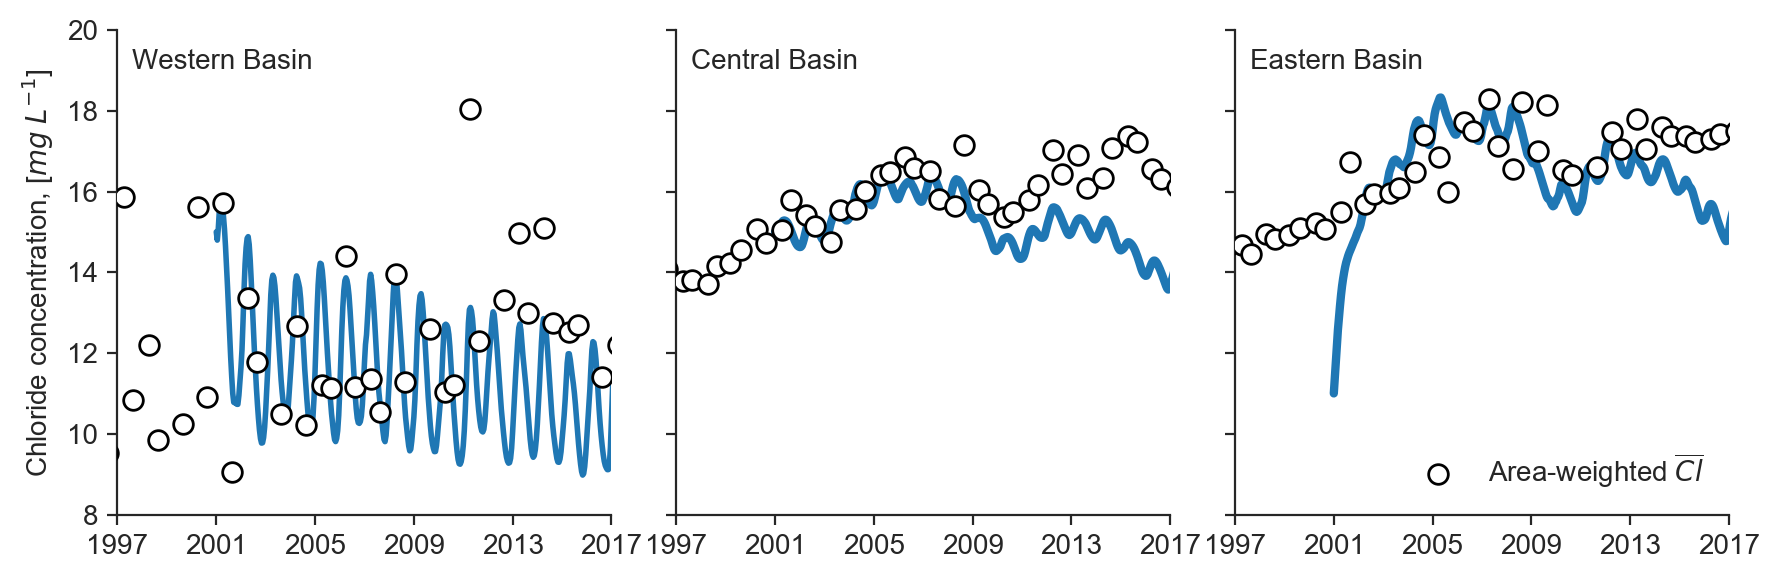

In [36]:
f, axes = plt.subplots(1,3, figsize=(9,3), dpi=200, sharey=True)





axes[0].plot((bl.time + shift)/12 + 1996, bl.species['Cwb']['concentration'].flatten(), label='Western', c=sns.color_palette()[0],lw=2)

# axes[1].plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ccb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[0], label='No inter-basin exchange')
axes[1].plot((bl.time + shift)/12 + 1996, bl.species['Ccb']['concentration'].flatten(), c=sns.color_palette()[0], lw=3)

axes[2].plot((bl.time + shift)/12 + 1996, bl.species['Ceb']['concentration'].flatten(), c=sns.color_palette()[0], lw=3)
# axes[2].plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ceb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[0])



axes[0].scatter(WB_AWA.Year + (WB_AWA.Month-1)/11, WB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
axes[1].scatter(CB_A.Year + (CB_A.Month-1)/11, CB_A['mean'].values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
axes[2].scatter(EB_A.Year + (EB_A.Month-1)/11, EB_A['mean'].values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10, label='Area-weighted $\overline{Cl}$')




props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='k')
axes[0].text(0.03,0.96, 'Western Basin', transform=axes[0].transAxes,
        verticalalignment='top', bbox=props)
axes[1].text(0.03,0.96, 'Central Basin', transform=axes[1].transAxes,
        verticalalignment='top', bbox=props)
axes[2].text(0.03,0.96, 'Eastern Basin', transform=axes[2].transAxes,
        verticalalignment='top', bbox=props)


# axes[0].text(-0.2, -0., 'Chloride Concentration, $mg\cdot L^{-1}$', transform=axes[0][0].transAxes, horizontalalignment='center',
#         verticalalignment='center', bbox=props, rotation=90)

axes[0].set_xticks(np.array([1996,2000,2004, 2008, 2012, 2016])+1)
axes[1].set_xticks(np.array([1996,2000,2004, 2008, 2012, 2016])+1)
axes[2].set_xticks(np.array([1996,2000,2004, 2008, 2012, 2016])+1)
# axes[1][0].set_xticklabels(['03','05','07', '09', '11', '13', '15', '17'])

axes[0].set_xlim(1997,2017)
axes[1].set_xlim(1997,2017)
axes[2].set_xlim(1997,2017)

axes[0].set_ylim(8,20)
axes[1].set_ylim(8,20)
axes[2].set_ylim(8,20)

axes[0].set_ylabel('Chloride concentration, [$mg$ $L^{-1}$]')


# axes[0][0].legend(loc=2)
axes[2].legend(loc=4, frameon=False)
axes[1].legend(loc=4, frameon=False)


plt.tight_layout(w_pad=0.1)

# for ax in axes:
#     ax.grid(lw=0.3)
# plt.subplots_adjust(left=0.15)   
sns.despine()
f.savefig('cl_modeled_vs_measured.pdf')


In [463]:
10/(30*24*60*60)*10**9

3858.024691358025